<h1>K-Means Clustering by Client's Incomes and Spend</h1>
<p>Dataset source: https://github.com/sowmyacr/kmeans_cluster/blob/master/CLV.csv</p>
<h3>The Aim of Module</h3>
<p>We will use the k-means clustering algorithm to derive the optimum number of clusters and understand the underlying customer segments based on the data provided.</p>
<h3>About the dataset</h3>
<p>The dataset consists of Annual income (in '000 USD) of 303 customers and their total spend (in '000 USD) on an e-commerce site for a period of one year.</p>

<h2>Full code</h2>

<b>#1 IMPORT MODULES AND PACKAGES</b>

In [12]:
# Main modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Plot styling modules
import seaborn as sns
sns.set()

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

<b>#2 IMPORT DATA-SET AND INSPECT IT</b>

In [13]:
# Read dataset
dataset = pd.read_csv('data/clients_data.csv')
print(dataset.head(6))
print('\nDataset contain {} rows and {} features.'.format(len(dataset),
                                                          len(dataset.columns)))

   INCOME  SPEND
0     233    150
1     250    187
2     204    172
3     236    178
4     354    163
5     192    148

Dataset contain 303 rows and 2 features.


In [14]:
# Inspect dataset
print(dataset.info())
print('\n{}'.format(dataset.describe().transpose()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
INCOME    303 non-null int64
SPEND     303 non-null int64
dtypes: int64(2)
memory usage: 4.8 KB
None

        count        mean        std    min    25%    50%    75%    max
INCOME  303.0  245.273927  48.499412  126.0  211.0  240.0  274.0  417.0
SPEND   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0


<b>#3 VISUALIZE RAW DATA</b>

c:\program files\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


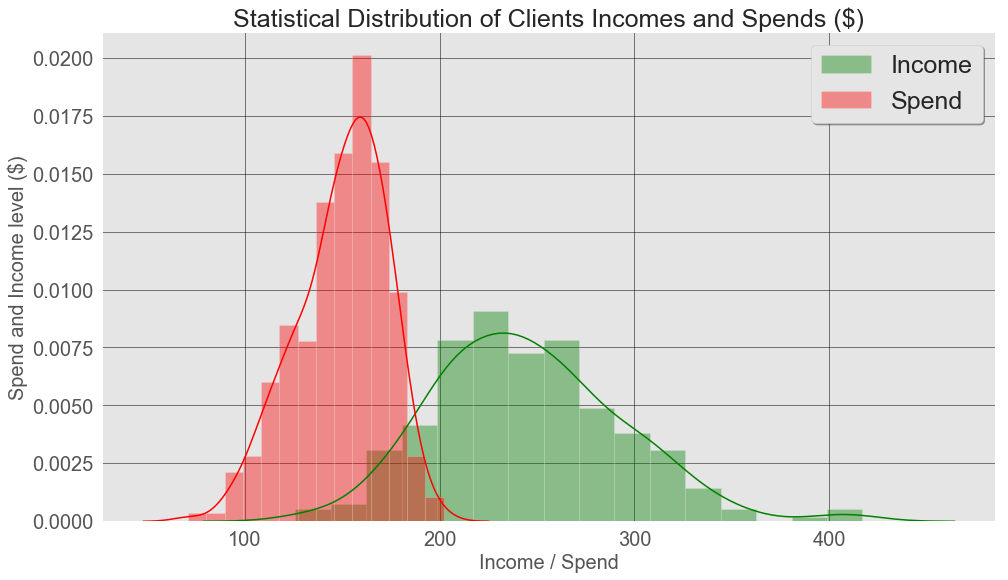

In [15]:
# Visualizing data with Seaborn
plot_income = sns.distplot(dataset['INCOME'], color = 'green', label = 'Income')
plot_spend = sns.distplot(dataset['SPEND'], color = 'red', label = 'Spend')
plt.title('Statistical Distribution of Clients Incomes and Spends ($)',
         family = 'Arial', size = 25)
plt.ylabel('Spend and Income level ($)', family = 'Arial', size = 20)
plt.xlabel('Income / Spend', family = 'Arial', size = 20)
plt.xticks(family = 'Arial', size = 20)
plt.yticks(family = 'Arial', size = 20)
plt.grid(which = 'major', color = 'black', alpha = 0.5)
plt.legend(loc = 'best', markerscale = 25, fontsize = 25, shadow = True)
plt.show()

[(0.42, 467.5143721295509)]

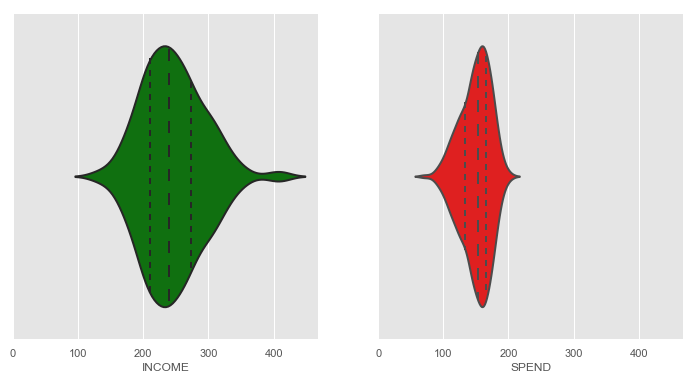

In [16]:
# Visualization in Violin
f, axes = plt.subplots(1, 2, figsize = (12, 6), sharex = True, sharey = True)
v1 = sns.violinplot(data = dataset, x = 'INCOME', color = 'green', ax = axes[0],
                   inner = 'quartile', linewidth = 2)
v2 = sns.violinplot(data = dataset, x = 'SPEND', color = 'red', ax = axes[1],
                   inner = 'quartile', linewidth = 2)
v1.set(xlim = 0.420)

<b>MACHINE LEARNING PART</b></br>
<p><b>#4 K-MEAN CLUSTERING</b></p>

In [17]:
# Extract Features to Suitable format for ML part
X = dataset.iloc[:, [0, 1]].values

In [18]:
# Using the Elbow method to find the Optimal Number of Cluster
from sklearn.cluster import KMeans

# We are going to commpute the within cluster sum of squares for 10
# different numbers of clusters. 
wscc = []

for i in range(1, 11):
    
    # 1. Fit the KMeans algorithm to our data X
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                   n_init = 10, random_state = 42)
    kmeans.fit(X)
    
    """
    ::: KMeans args :::
    max_iter : the maximum number of iteration there can be to find
               the final clusters when KMeans algorithm is running.
               
    n_init   : the number of times the KMeans algorithm will be run
               with different initial centroids.
    """
    
    # 2. Compute the within cluster Sum of Swuares and Append to
    # our WSCC list (a.k.a. Inertia)
    wscc.append(kmeans.inertia_)

<b>#5 PLOT THE ELBOW METHOD RESULTS</b>

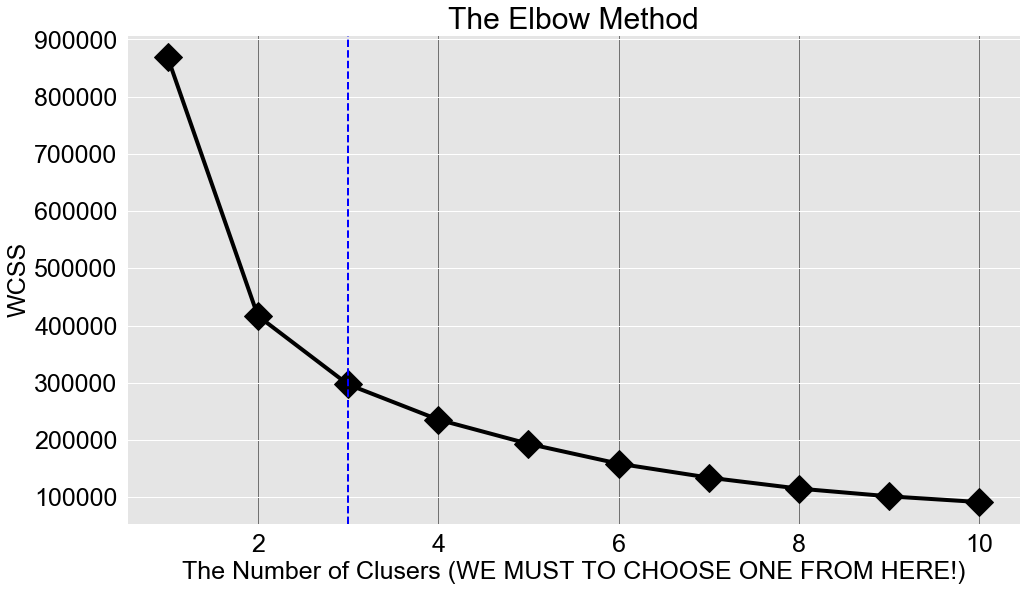

In [19]:
# Plot the Elbow Method
_ = plt.plot(range(1, 11), wscc, linewidth = 4, color = 'black',
             marker = 'D', markersize = 20)
_ = plt.title('The Elbow Method', family = 'Arial', fontsize = 30, color = 'black')
_ = plt.xlabel('The Number of Clusers (WE MUST TO CHOOSE ONE FROM HERE!)',
              family = 'Arial', fontsize = 25, color = 'black')
_ = plt.ylabel('WCSS', family = 'Arial', fontsize = 25, color = 'black')
_ = plt.xticks(fontsize = 25, color = 'black')
_ = plt.yticks(fontsize = 25, color = 'black')
_ = plt.grid(which = 'both', color = 'black', axis = 'x', alpha = 0.5)
_ = plt.axvline(x = 3, linewidth = 2, color = 'blue', linestyle = '--')
_ = plt.show()

In [20]:
# Apply KMEans to the Data

number_of_clusters = 4

kmeans = KMeans(n_clusters = number_of_clusters, init = 'k-means++', max_iter = 10, random_state = 42)

# Return: which observation belong which cluster to.
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[0 0 1 0 3 1 3 0 1 1 0 2 0 1 0 1 3 2 0 0 0 0 0 0 1 3 1 1 3 1 1 1 0 0 1 1 3
 0 0 3 3 0 1 0 3 3 0 0 1 0 0 3 0 1 0 1 0 0 1 3 2 3 1 1 1 1 1 0 0 1 0 0 1 0
 1 0 0 0 1 0 0 3 3 3 2 0 0 1 1 2 0 1 0 3 1 2 3 0 3 0 0 0 1 0 1 1 0 0 0 0 3
 1 3 1 0 1 1 1 1 0 3 0 0 0 1 1 1 0 1 2 1 0 3 0 3 0 1 1 1 2 3 3 1 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 1 1 0 0 3 1 1 1 2 0 0 0 1 0 0 0 0 1 1 0 3 1 2 3 2 3 0 2
 3 0 2 0 1 3 1 1 2 1 3 0 0 2 0 1 0 2 0 1 0 0 0 1 1 0 0 1 3 0 3 2 3 2 0 3 1
 0 2 2 1 2 1 3 3 0 2 3 2 3 3 3 3 3 0 2 0 1 2 1 0 3 2 0 0 2 0 2 2 2 3 2 1 0
 0 0 0 2 0 1 1 3 1 2 2 0 0 2 0 2 1 2 0 3 1 3 1 1 0 1 3 1 0 3 1 1 3 0 1 1 1
 1 1 2 2 1 1 0]


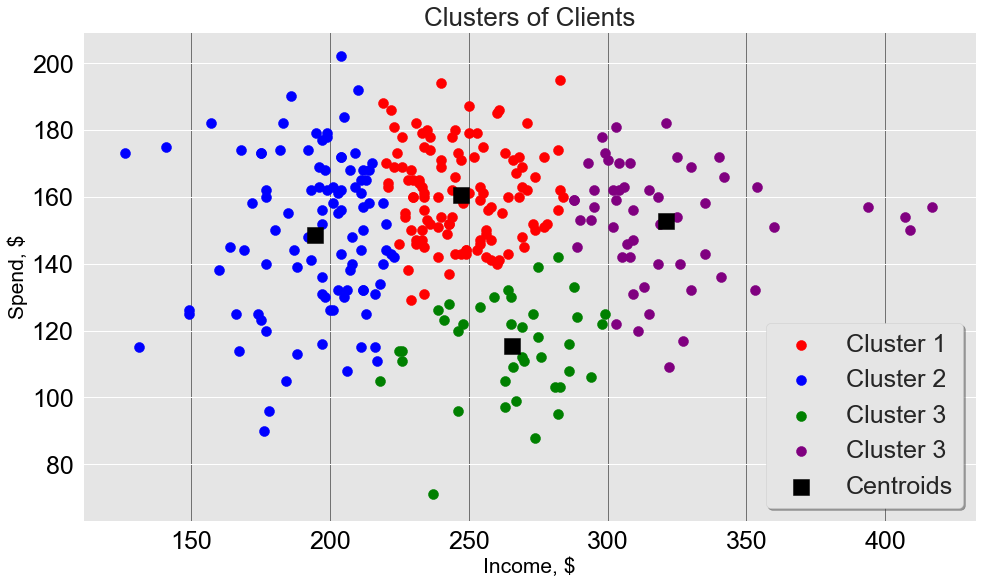

In [21]:
# Plot the Results
_ = plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
_ = plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
_ = plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
_ = plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'purple', label = 'Cluster 3')

# Plot Centroids
_ = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s = 250, c = 'black', label = 'Centroids', marker = 's')

# Decorate plot
_ = plt.title('Clusters of Clients', family = 'Arial', fontsize = 26)
_ = plt.legend(loc = 'best', markerscale = 1, fontsize = 25, shadow = True)
_ = plt.xlabel('Income, $', family = 'Arial', fontsize = 21, color = 'black')
_ = plt.ylabel('Spend, $', family = 'Arial', fontsize = 21, color = 'black')
_ = plt.xticks(fontsize = 25, color = 'black')
_ = plt.yticks(fontsize = 25, color = 'black')
_ = plt.grid(which = 'major', color = 'black', axis = 'x', alpha = 0.5)
_ = plt.show()

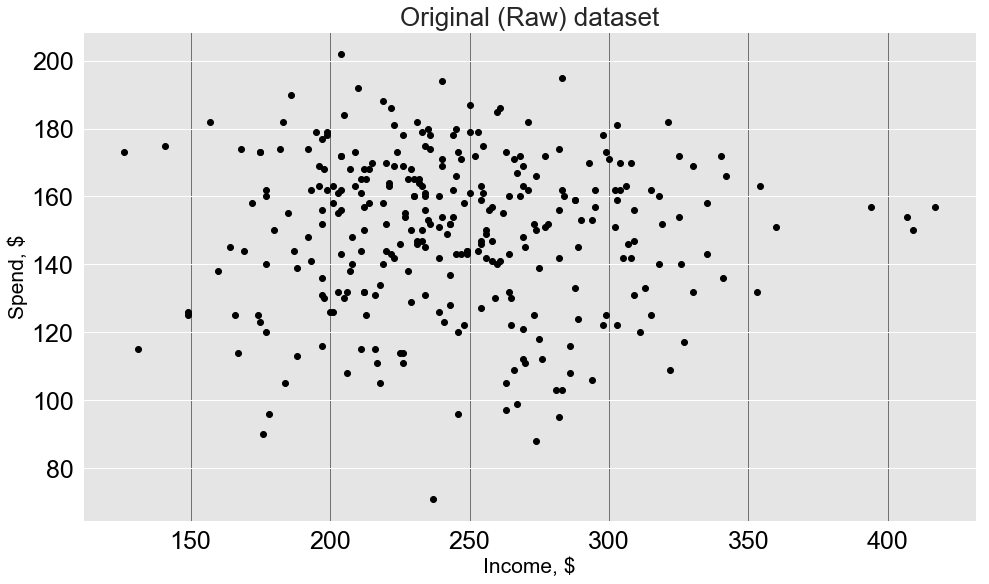

In [22]:
# Remember the raw dataset
_ = plt.plot(dataset['INCOME'], dataset['SPEND'], linewidth = 0, marker = 'o', color = 'black')
_ = plt.title('Original (Raw) dataset', family = 'Arial', fontsize = 26)
_ = plt.xlabel('Income, $', family = 'Arial', fontsize = 21, color = 'black')
_ = plt.ylabel('Spend, $', family = 'Arial', fontsize = 21, color = 'black')
_ = plt.xticks(fontsize = 25, color = 'black')
_ = plt.yticks(fontsize = 25, color = 'black')
_ = plt.grid(which = 'major', color = 'black', axis = 'x', alpha = 0.5)
_ = plt.show()

<h2>Finish.</h2>
<b>Prepared by Vytautas Bielinskas, 2018</b>